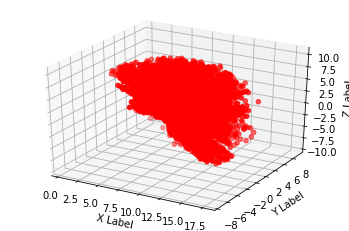

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import pandas

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


df = pandas.read_csv('../data/Gaia-SDSS.csv')
xs = df.GalRecX
ys = df.GalRecY
zs = df.GalRecZ

ax.scatter(xs[0:100], ys[0:100], zs[0:100], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

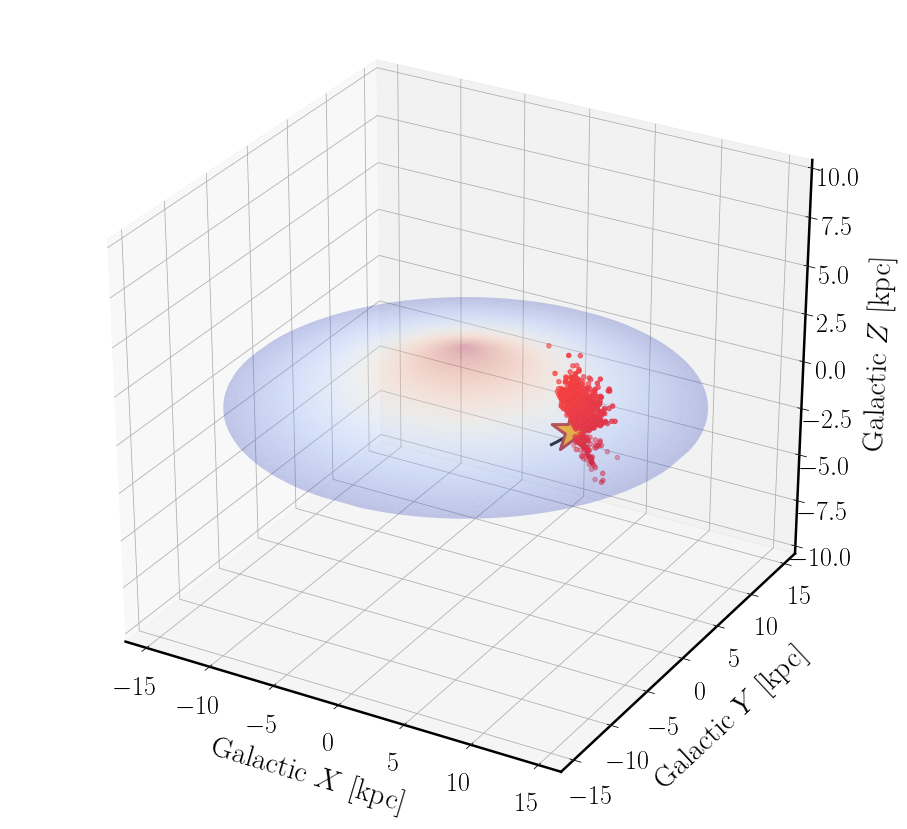

In [11]:
from numpy import *
import matplotlib.cm as cm
from PlotFuncs import *

# Galpy
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from mpl_toolkits.mplot3d import Axes3D
from astropy import units
from skimage import measure

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(figsize=(16,15))
ax = fig.gca(projection='3d')


xlim=16.0
ylim=16.0
zlim=10.0
T_Myr=10.0

ax.scatter(xs[0:1000], ys[0:1000], zs[0:1000], c='r', marker='o')


# disk
def rhoR(x,y,z):
    R = sqrt(x**2 + y**2)
    rp = sqrt(R**2.0+(z/0.5)**2.0)
    return 95.6*1000/((1.0+(rp/0.075))**1.8)*exp(-(rp/2.1)**2.0)

def rhoz1(x,y,z):
    R = sqrt(x**2 + y**2+z**2.0)
    return 816.6/(2*0.3)*exp(-abs(z)/0.3 - R/2.6)

def rhoz2(x,y,z):
    R = sqrt(x**2 + y**2)
    return 209.5/(2*0.9)*exp(-abs(z)/0.9 - R/3.6)

def rho_full(x,y,z):
    return rhoR(x,y,z)+rhoz1(x,y,z)+rhoz2(x,y,z)

ni = 50
xmin = -xlim
xmax = xlim
ymin = -ylim
ymax = ylim
zmin = 0.0
zmax = 3.0
X, Y, Z = meshgrid(linspace(xmin,xmax,ni),linspace(ymin,ymax,ni),linspace(zmin,zmax,ni))
verts, faces, _, _ = measure.marching_cubes_lewiner(rho_full(X,Y,Z), rho_full(0.0,0.0,zmax),spacing=(1.0, 1.0, 1.0))
xverts = verts[:, 0]*(xmax-xmin)/(ni-1) + xmin
yverts = verts[:, 1]*(ymax-ymin)/(ni-1) + ymin
zverts = verts[:, 2]*(zmax-zmin)/(ni-1) + zmin
ax.plot_trisurf(xverts, yverts, faces, zverts,cmap=cm.coolwarm, lw=1,alpha=0.3,zorder=-10)


# orbits
kpc = units.kpc
kms = units.km/units.s
deg = units.deg
Gyr = units.Gyr

Flip = True

ts = linspace(0.0,T_Myr*units.Myr,500)

# Sun -t
o_sun1 = Orbit(vxvv=[Sun[0]*kpc,0.0*kms,232.0*kms,0.0*kpc,0.0*kms,0.0*deg]).flip()
o_sun1.integrate(ts,MWPotential2014)
ax.plot(o_sun1.x(ts),o_sun1.y(ts),o_sun1.z(ts),'k-',lw=3)
# +t
o_sun = Orbit(vxvv=[Sun[0]*kpc,0.0*kms,232.0*kms,0.0*kpc,0.0*kms,0.0*deg])
o_sun.integrate(ts,MWPotential2014)
ax.plot(o_sun.x(ts),o_sun.y(ts),o_sun.z(ts),'k-',lw=3)

ax.scatter(o_sun.x(),o_sun.y(),o_sun.z(),s=2000,marker='*',color='orange',edgecolor='firebrick',lw=3,zorder=10)


# Galactic center
#ax.scatter(0, 0, 0,marker='o',s=1000,color='r')

ax.set_xlim3d([-xlim,xlim])
ax.set_ylim3d([-ylim,ylim])
ax.set_zlim3d([-zlim,zlim])
ax.set_xlabel('Galactic $X$ [kpc]',fontsize=30,labelpad=30)
ax.set_ylabel('Galactic $Y$ [kpc]',fontsize=30,labelpad=30)
ax.set_zlabel('Galactic $Z$ [kpc]',fontsize=30,labelpad=30)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=26)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.show()
